In [1]:
from train_unet import *

In [2]:
val(0)

Validation epoch 0: avg_iou = 0.010632431871473178, avg_acc = 0.020367118533971763


3.302261157178167

In [2]:
train_loss, val_loss = train()

starting training
epoch0, iter0, loss: 3.685929536819458
epoch0, iter400, loss: 1.6361274719238281
epoch0, iter800, loss: 1.0239461660385132
epoch0, iter1200, loss: 1.0116914510726929
Finish epoch 0, time elapsed 95.67649793624878
Validation epoch 0: avg_iou = 0.5110625250125999, avg_acc = 0.661684257637209
best iou achieved, saving model
--------------------
epoch1, iter0, loss: 1.024666428565979
epoch1, iter400, loss: 1.486568808555603
epoch1, iter800, loss: 0.708554744720459
epoch1, iter1200, loss: 0.4473520815372467
Finish epoch 1, time elapsed 94.70142197608948
Validation epoch 1: avg_iou = 0.557945509855427, avg_acc = 0.7004512301131861
best iou achieved, saving model
--------------------
epoch2, iter0, loss: 0.960839569568634
epoch2, iter400, loss: 1.1878162622451782
epoch2, iter800, loss: 0.7394666075706482
epoch2, iter1200, loss: 0.6530246734619141
Finish epoch 2, time elapsed 94.65037488937378
Validation epoch 2: avg_iou = 0.6190338459922307, avg_acc = 0.7533154178911181
best

epoch25, iter0, loss: 0.19682331383228302
epoch25, iter400, loss: 0.2912702262401581
epoch25, iter800, loss: 0.2092183381319046
epoch25, iter1200, loss: 0.26766228675842285
Finish epoch 25, time elapsed 82.9953625202179
Validation epoch 25: avg_iou = 0.6851446490234403, avg_acc = 0.8047103056267126
best iou achieved, saving model
--------------------
epoch26, iter0, loss: 0.23241181671619415
epoch26, iter400, loss: 0.24326477944850922
epoch26, iter800, loss: 0.3263980448246002
epoch26, iter1200, loss: 0.22643370926380157
Finish epoch 26, time elapsed 71.86797785758972
Validation epoch 26: avg_iou = 0.6821343475758139, avg_acc = 0.8027943666301557
--------------------
epoch27, iter0, loss: 0.24527932703495026
epoch27, iter400, loss: 0.2116350680589676
epoch27, iter800, loss: 0.2831399738788605
epoch27, iter1200, loss: 0.26211559772491455
Finish epoch 27, time elapsed 72.99234342575073
Validation epoch 27: avg_iou = 0.6833205013132807, avg_acc = 0.8034995140424416
EarlyStop after 27 epoc

In [3]:
def plot_loss_curves(train_loss,val_loss):
    title = "Loss 5c - Unet"
    fig_name = "Loss_unet.jpg"
    x = [i for i in range(len(train_loss))]
    plt.plot(x, train_loss,label="Train Loss")
    plt.plot(x, val_loss,label="Validation Loss")
    plt.legend()
    plt.xlabel("# of epoch")
    plt.ylabel("Cross Entropy Loss")
    plt.grid(True)
    plt.title(title)
    plt.savefig(fig_name, dpi=300)
    plt.show()

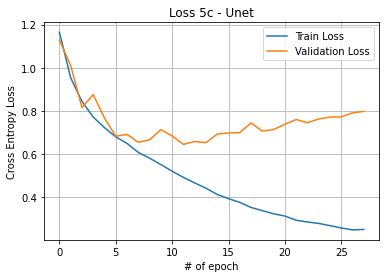

In [4]:
plot_loss_curves(train_loss,val_loss)

Final test from best model : avg_iou = 0.685162195385392, avg_acc = 0.8047274819060938
 Class wise ious getting saved in unet_IOU_Classwise.csv file


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


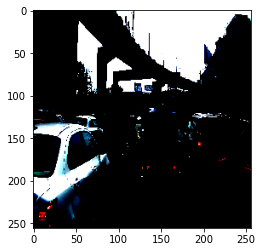

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


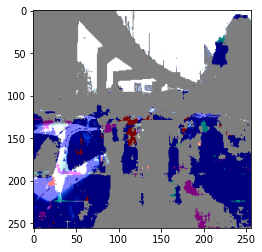

In [5]:
test()